# Data Normalisation and Transformation

When one or more datasets affects results disproportionately, normalization or scaling gives a level playing field. In this activity, we will apply different data methods for data normalisation and transformation. We first read the dataset that is used for the first part of the analysis. 


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv( 'wine_data.csv', header = None, usecols = [0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [2]:
df.describe()

,Class label,Alcohol,Malic acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


As we can see in the tables above, the features, Alcohol (percent/volumne) and Malic acid (g/l) are measured on different scales, so scaling is necessary prior to any comparison or combination of data.

In [3]:
df.Alcohol.mean() / df["Malic acid"].mean() # difference is factor of ~5x

5.564503330367661

## 1. Z-Score Normalisation (standardisation): 

We use scikit-learn linrary for standardise data (mean=0, SD=1). The class you are going to use is the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScaler</a> class. More reading materials can be found <a href="http://scikit-learn.org/stable/modules/preprocessing.html">here</a>. 

The task here it to standardise the values of Alcohol and Malic Acid, and append the standard variables to the DataFrame "df" as follows

<img src="fig_1.png" alt="Smiley face" height="400" width="500">

In [9]:
from sklearn import preprocessing

In [10]:
std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']]) # an array not a df
df_std[0:5]

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377]])

In [11]:
# put it alongside data... to view
df['Ascaled'] = df_std[:,0] # so 'Ascaled' is Alcohol scaled
df['MAscaled'] = df_std[:,1] # and 'MAscaled' is Malic acid scaled
df.head()

,Class label,Alcohol,Malic acid,Ascaled,MAscaled
0,1,14.23,1.71,1.518613,-0.562250
1,1,13.20,1.78,0.246290,-0.499413
2,1,13.16,2.36,0.196879,0.021231
3,1,14.37,1.95,1.691550,-0.346811
4,1,13.24,2.59,0.295700,0.227694


Now, compute and display the normalised values for both features. Let's check if they have mean of 0 and SD= 1.

In [12]:
df.describe() # check that μ = 0 and σ = 1... approx

,Class label,Alcohol,Malic acid,Ascaled,MAscaled
count,178.000000,178.000000,178.000000,1.780000e+02,1.780000e+02
mean,1.938202,13.000618,2.336348,-8.619821e-16,-8.357859e-17
std,0.775035,0.811827,1.117146,1.002821e+00,1.002821e+00
min,1.000000,11.030000,0.740000,-2.434235e+00,-1.432983e+00
25%,1.000000,12.362500,1.602500,-7.882448e-01,-6.587486e-01
50%,2.000000,13.050000,1.865000,6.099988e-02,-4.231120e-01
75%,3.000000,13.677500,3.082500,8.361286e-01,6.697929e-01
max,3.000000,14.830000,5.800000,2.259772e+00,3.109192e+00


Or you can print out values:

In [13]:
print('Mean after standardisation:\nAlcohol = {:.2f}, Malic acid = {:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardisation:\nAlcohol = {:.2f}, Malic acid = {:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardisation:
Alcohol = -0.00, Malic acid = -0.00

Standard deviation after standardisation:
Alcohol = 1.00, Malic acid = 1.00


#### Compare the variables before and after normalization with plots
In order to investigate how the normalization actually affect the data, we can visualize the data by plotting the variable values.

Firstly, plot the original data, i.e., data before normalization

In [14]:
%matplotlib inline

(<matplotlib.axes._subplots.AxesSubplot at 0x111aad358>,
 <matplotlib.axes._subplots.AxesSubplot at 0x111aad358>)

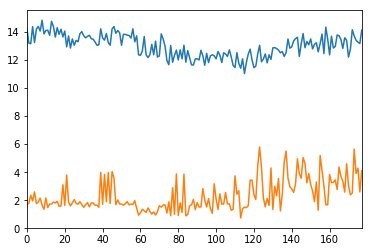

In [15]:
df["Alcohol"].plot(), df["Malic acid"].plot()

Now, we plot  the standardized data, and observe the range and the centre of the distribution for the standardised features. 

(<matplotlib.axes._subplots.AxesSubplot at 0x114e51b70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x114e51b70>)

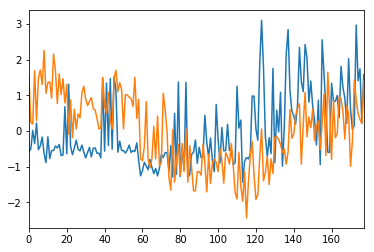

In [16]:
# or split them from the others
df["MAscaled"].plot(), df["Ascaled"].plot()

You can see from above graphs that both original and standardized data are in the same shape but shifted.

(<matplotlib.axes._subplots.AxesSubplot at 0x114fc7828>,
 <matplotlib.axes._subplots.AxesSubplot at 0x114fc7828>)

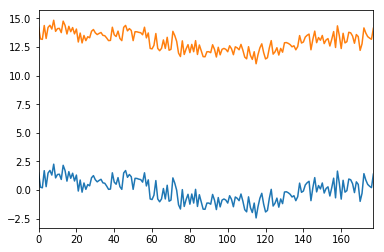

In [17]:
df["Ascaled"].plot(), df["Alcohol"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x115096748>,
 <matplotlib.axes._subplots.AxesSubplot at 0x115096748>)

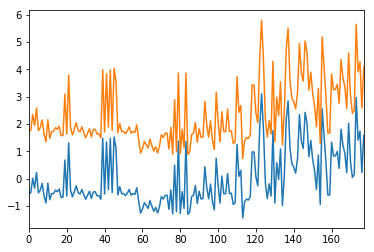

In [18]:
df["MAscaled"].plot(), df["Malic acid"].plot()


## 2. MinMax Noramlisation:

In this section, we discuss a different type of normalization for reshaping the range of data. We process the same data we used in the previous section. We can implement this either Scikit-Learn or manually. 

### 2.1 Using scikit-learn:
please refer to section 4.3.1.1 "<a href="http://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range">Scaling features to a range</a>" for more detailed discussion. Similar to what you have done with the StandardScaler, here you are going to use the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">MinMaxScaler</a>.

In [19]:
minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])
df_minmax[0:5]

array([[ 0.84210526,  0.1916996 ],
       [ 0.57105263,  0.2055336 ],
       [ 0.56052632,  0.3201581 ],
       [ 0.87894737,  0.23913043],
       [ 0.58157895,  0.36561265]])

### 2.2 Manually:
Of course, you can implement the Min-Max normalization according to the formulas discussed in the lecture.

Firstly, find the min and max of "df.Alcohol".

In [20]:
minA = df.Alcohol.min()
maxA = df.Alcohol.max()
minA, maxA

(11.029999999999999, 14.83)

Manually apply the min-max normalization to the first value of "df.Alcohol", 

In [21]:
a = df.Alcohol[0] # the first value, for practice
#Write you code here
mma = (a - minA) / (maxA - minA)
mma

0.84210526315789491

and then compare the manually computed value with the one given by the MinMaxScaler above.

In [22]:
df_minmax[0][0]

0.84210526315789513

The two values should be the same.
Now, let's look at the normalization of the max value in "df.Alcohol".

In [23]:
a = df[df.Alcohol == df.Alcohol.max()].Alcohol
mma = (a - minA) / (maxA - minA)
mma

8    1.0
Name: Alcohol, dtype: float64

The normalized value of max must be 1.0 exactly, think about the reason! Then, how about the 
min value of "df.Alcohol"?

In [24]:
print('Min-value after min-max scaling:\nAlcohol = {:.2f}, Malic acid = {:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol = {:.2f}, Malic acid = {:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol = 0.00, Malic acid = 0.00

Max-value after min-max scaling:
Alcohol = 1.00, Malic acid = 1.00


### 2.3 Plot the original, standardised and normalised data values. 

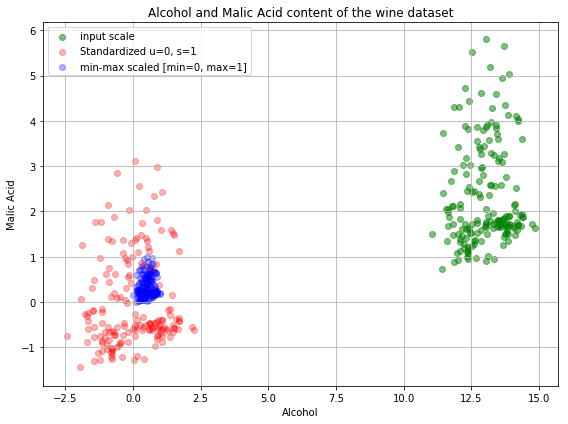

In [25]:
# and plot
%matplotlib inline

from matplotlib import pyplot as plt

def plot():
    f = plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'],
            color='green', label='input scale', alpha=0.5)

 #   plt.scatter(df_std[:,0], df_std[:,1], color='red',
 #           label='Standardized [$$N  (\mu=0, \; \sigma=1)$$]', alpha=0.3)
    plt.scatter(df_std[:,0], df_std[:,1], color='red',
             label='Standardized u=0, s=1', alpha=0.3) # can't print: μ = 0, σ = 0
    
    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()
    #f.savefig("z_min_max.pdf", bbox_inches='tight')

plot()
plt.show()

#### The plot above includes the wine datapoints on all three different scales: 
* the input scale  where the alcohol content was measured in volume-percent (green),
* the standardized features (red), and 
* the normalized features (blue). 

#### In the following plot, we will zoom in into the three different axis-scales while dispalying class values. 

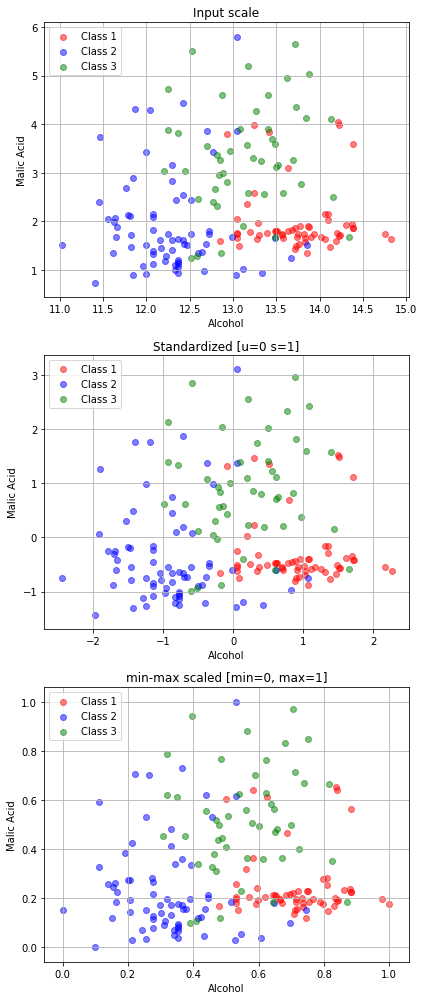

In [26]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)),
               (df[['Alcohol', 'Malic acid']].values, df_std, df_minmax),
               ('Input scale',
                'Standardized [u=0 s=1]',
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Class label'].values == i, 0],
                  d[df['Class label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()

plt.show()

## 3. Data Transformation:

Another way to reshape data is to perform data transformation. We will display an example of data that is with right skew (positive skew). We will need to compress large values. We first read the data used for this activity. 

In [27]:
import pandas as pd
data = pd.read_csv("bmr.csv")

In [28]:
data.head()

,Order,Family,Species,Mass(g),BMR(W),Speciesavg.mass(g),Speciesavg.BMR(W),References
0,Artiodactyla,Antilocapridae,Antilocapraamericana,32000.0,49.984,34779.3,50.973,Lovegrove(2000)
1,Artiodactyla,Antilocapridae,Antilocapraamericana,37800.0,51.981,NaN,NaN,White&Seymour(2003)
2,Artiodactyla,Bovidae,Bostaurus,347000.0,306.770,347000.0,306.770,Heusner(1991)
3,Artiodactyla,Bovidae,Cephalophusmonticola,4200.0,10.075,4200.0,10.075,Lovegrove(2000)
4,Artiodactyla,Bovidae,Connochaetestaurinus,196500.0,230.073,196500.0,230.073,"White&Seymour(2003),Rogerson(1968)"


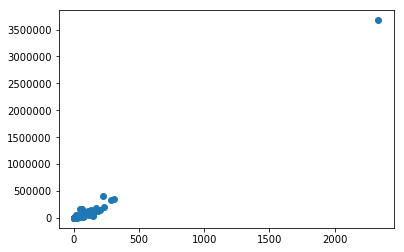

In [29]:
plt.scatter(data["BMR(W)"], data["Mass(g)"]) # before

### So, which transformation type will suit this data?

In Tukey's ladder of power, we discussed different kind of transformation. Here you are going to 
compare the following three kinds of transformations
* Root transformation
* Square power transformation
* Log transformation

The implementation of Root transformation is given as follows. You need to finish the other two kinds of transformation.

### 3.1 Root transformation:

In [30]:
import math
data['lmr'] = None
i = 0
for row in data.iterrows():
    data['lmr'].at[i] = math.sqrt(data["BMR(W)"][i])
    i += 1

data.head()

,Order,Family,Species,Mass(g),BMR(W),Speciesavg.mass(g),Speciesavg.BMR(W),References,lmr
0,Artiodactyla,Antilocapridae,Antilocapraamericana,32000.0,49.984,34779.3,50.973,Lovegrove(2000),7.06994
1,Artiodactyla,Antilocapridae,Antilocapraamericana,37800.0,51.981,NaN,NaN,White&Seymour(2003),7.20979
2,Artiodactyla,Bovidae,Bostaurus,347000.0,306.770,347000.0,306.770,Heusner(1991),17.5149
3,Artiodactyla,Bovidae,Cephalophusmonticola,4200.0,10.075,4200.0,10.075,Lovegrove(2000),3.17411
4,Artiodactyla,Bovidae,Connochaetestaurinus,196500.0,230.073,196500.0,230.073,"White&Seymour(2003),Rogerson(1968)",15.1682


In [31]:
data['lbm'] = None
i = 0
for row in data.iterrows():
    data['lbm'].at[i] = math.sqrt(data["Mass(g)"][i])
    i += 1  
data.head()

,Order,Family,Species,Mass(g),BMR(W),Speciesavg.mass(g),Speciesavg.BMR(W),References,lmr,lbm
0,Artiodactyla,Antilocapridae,Antilocapraamericana,32000.0,49.984,34779.3,50.973,Lovegrove(2000),7.06994,178.885
1,Artiodactyla,Antilocapridae,Antilocapraamericana,37800.0,51.981,NaN,NaN,White&Seymour(2003),7.20979,194.422
2,Artiodactyla,Bovidae,Bostaurus,347000.0,306.770,347000.0,306.770,Heusner(1991),17.5149,589.067
3,Artiodactyla,Bovidae,Cephalophusmonticola,4200.0,10.075,4200.0,10.075,Lovegrove(2000),3.17411,64.8074
4,Artiodactyla,Bovidae,Connochaetestaurinus,196500.0,230.073,196500.0,230.073,"White&Seymour(2003),Rogerson(1968)",15.1682,443.283


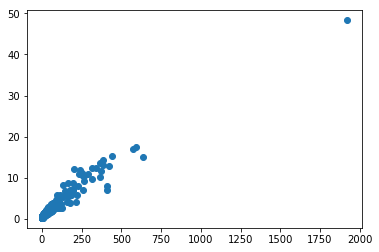

In [32]:
plt.scatter(data.lbm, data.lmr) # and after

#### Does it give a better spread of the data? Let's try something else.

### 3.2 Square power transformation:

In [33]:
import math
data['lmr'] = None
i = 0
for row in data.iterrows():
    data['lmr'].at[i] = math.pow(data["BMR(W)"][i],2)
    i += 1

    
data.head()

,Order,Family,Species,Mass(g),BMR(W),Speciesavg.mass(g),Speciesavg.BMR(W),References,lmr,lbm
0,Artiodactyla,Antilocapridae,Antilocapraamericana,32000.0,49.984,34779.3,50.973,Lovegrove(2000),2498.4,178.885
1,Artiodactyla,Antilocapridae,Antilocapraamericana,37800.0,51.981,NaN,NaN,White&Seymour(2003),2702.02,194.422
2,Artiodactyla,Bovidae,Bostaurus,347000.0,306.770,347000.0,306.770,Heusner(1991),94107.8,589.067
3,Artiodactyla,Bovidae,Cephalophusmonticola,4200.0,10.075,4200.0,10.075,Lovegrove(2000),101.506,64.8074
4,Artiodactyla,Bovidae,Connochaetestaurinus,196500.0,230.073,196500.0,230.073,"White&Seymour(2003),Rogerson(1968)",52933.6,443.283


In [34]:
data['lbm'] = None
i = 0
for row in data.iterrows():
    data['lbm'].at[i] = math.pow(data["Mass(g)"][i],2)
    i += 1

    
data.head()

,Order,Family,Species,Mass(g),BMR(W),Speciesavg.mass(g),Speciesavg.BMR(W),References,lmr,lbm
0,Artiodactyla,Antilocapridae,Antilocapraamericana,32000.0,49.984,34779.3,50.973,Lovegrove(2000),2498.4,1.024e+09
1,Artiodactyla,Antilocapridae,Antilocapraamericana,37800.0,51.981,NaN,NaN,White&Seymour(2003),2702.02,1.42884e+09
2,Artiodactyla,Bovidae,Bostaurus,347000.0,306.770,347000.0,306.770,Heusner(1991),94107.8,1.20409e+11
3,Artiodactyla,Bovidae,Cephalophusmonticola,4200.0,10.075,4200.0,10.075,Lovegrove(2000),101.506,1.764e+07
4,Artiodactyla,Bovidae,Connochaetestaurinus,196500.0,230.073,196500.0,230.073,"White&Seymour(2003),Rogerson(1968)",52933.6,3.86122e+10


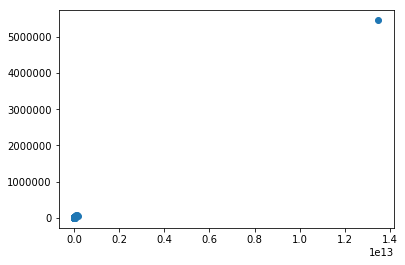

In [35]:
plt.scatter(data.lbm, data.lmr) # and after

#### Can you justify the output of this figure?

### 3.3 Log transformation:

In [36]:
import math
data['lmr'] = None
i = 0
for row in data.iterrows():
    data['lmr'].at[i] = math.log(data["BMR(W)"][i])
    i += 1

    
data.head()

,Order,Family,Species,Mass(g),BMR(W),Speciesavg.mass(g),Speciesavg.BMR(W),References,lmr,lbm
0,Artiodactyla,Antilocapridae,Antilocapraamericana,32000.0,49.984,34779.3,50.973,Lovegrove(2000),3.9117,1.024e+09
1,Artiodactyla,Antilocapridae,Antilocapraamericana,37800.0,51.981,NaN,NaN,White&Seymour(2003),3.95088,1.42884e+09
2,Artiodactyla,Bovidae,Bostaurus,347000.0,306.770,347000.0,306.770,Heusner(1991),5.7261,1.20409e+11
3,Artiodactyla,Bovidae,Cephalophusmonticola,4200.0,10.075,4200.0,10.075,Lovegrove(2000),2.31006,1.764e+07
4,Artiodactyla,Bovidae,Connochaetestaurinus,196500.0,230.073,196500.0,230.073,"White&Seymour(2003),Rogerson(1968)",5.4384,3.86122e+10


In [37]:
data['lbm'] = None
i = 0
for row in data.iterrows():
    data['lbm'].at[i] = math.log(data["Mass(g)"][i])
    i += 1

    
data.head()

,Order,Family,Species,Mass(g),BMR(W),Speciesavg.mass(g),Speciesavg.BMR(W),References,lmr,lbm
0,Artiodactyla,Antilocapridae,Antilocapraamericana,32000.0,49.984,34779.3,50.973,Lovegrove(2000),3.9117,10.3735
1,Artiodactyla,Antilocapridae,Antilocapraamericana,37800.0,51.981,NaN,NaN,White&Seymour(2003),3.95088,10.5401
2,Artiodactyla,Bovidae,Bostaurus,347000.0,306.770,347000.0,306.770,Heusner(1991),5.7261,12.7571
3,Artiodactyla,Bovidae,Cephalophusmonticola,4200.0,10.075,4200.0,10.075,Lovegrove(2000),2.31006,8.34284
4,Artiodactyla,Bovidae,Connochaetestaurinus,196500.0,230.073,196500.0,230.073,"White&Seymour(2003),Rogerson(1968)",5.4384,12.1884


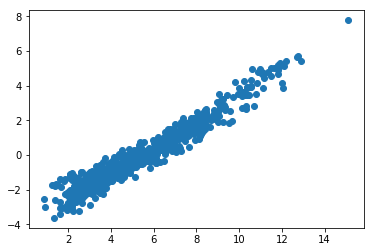

In [38]:
plt.scatter(data.lbm, data.lmr) # and after

Apparently, the best transformation for this data is log transformation. As the data is positively skewed. we will need to compress large values. That means we need to move down the ladder of powers to spread out data that is clustered at lower values. Therefore, logarithmic is the appropriate transformation in this case. 

Some materials used in this tutorial are based on http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

## 4. Home work:
Consider the following dataset:

In [39]:
body_mass = [32000, 37800, 347000, 4200, 196500, 100000, 4290, 
32000, 65000, 69125, 9600, 133300, 150000, 407000, 115000, 67000, 
325000, 21500, 58588, 65320, 85000, 135000, 20500, 1613, 1618]

metabolic_rate = [49.984, 51.981, 306.770, 10.075, 230.073, 
148.949, 11.966, 46.414, 123.287, 106.663, 20.619, 180.150, 
200.830, 224.779, 148.940, 112.430, 286.847, 46.347, 142.863, 
106.670, 119.660, 104.150, 33.165, 4.900, 4.865]

#### What will be the appropriate transformation to apply for this data? Post your finds in the forum.